<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/Markowitz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import *
import os

In [2]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 756 (delta 38), reused 18 (delta 3), pack-reused 660
Receiving objects: 100% (756/756), 3.89 MiB | 831.00 KiB/s, done.
Resolving deltas: 100% (316/316), done.


In [3]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src/project3/week1/

/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/week1


In [0]:
#Load data
os.chdir('/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/week1')
file_chdir = os.getcwd()
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
  for file in files:
    if os.path.splitext(file)[1] == '.csv' and os.path.splitext(file)[0] != 'VXX':
      filecsv_list.append(file)
R = pd.DataFrame()
for csv in filecsv_list:
  data = pd.read_csv(csv)
  #calculate return
  R[csv.strip('.csv')] = np.array([np.log(data['Adj Close'][j]/data['Adj Close'][j-1]) for j in range(1,len(data['Adj Close']))])
 

In [5]:
filecsv_list

['TM(Toyota).csv',
 'GOOG.csv',
 'AMD.csv',
 'AEP(American Electric Power).csv',
 'BAC(Bank of American).csv',
 'JPM(JPMorgan).csv',
 'BRK-B(Berkshire Hathaway).csv',
 'DIS(disney).csv',
 'AAPL.csv',
 'VZ(Verizon Communications).csv',
 'MAR(Marriot).csv',
 'TEL(TE Connectivity).csv',
 'MCD(McDonald).csv',
 'BABA(Alibaba).csv',
 'PG(Procter & Gamble).csv',
 'KO(Cola).csv',
 'LULU(Lululemon).csv',
 'FB(Facebook).csv',
 'SKX(Skechers).csv',
 'WMT(Walmart).csv']

In [0]:
#Find the break points for every year
break_points = []
break_points.append(data[data['Date'].isin(['10/18/2016'])].index[0])
break_points.append(data[data['Date'].isin(['10/18/2017'])].index[0])
break_points.append(data[data['Date'].isin(['10/18/2018'])].index[0])
break_points.append(data[data['Date'].isin(['10/18/2019'])].index[0])

In [7]:
break_points

[0, 252, 504, 755]

In [0]:
def ghm(R_expect,R_cov):
  one = np.ones((len(R_expect),1))
  A = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),R_expect)
  B = np.dot(np.dot(R_expect.reshape(1,-1),inv(R_cov)),R_expect)
  C = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),one)
  D = B*C - A**2
  g = (B * np.dot(inv(R_cov), one) - A* np.dot(inv(R_cov), R_expect))/D
  h = (C * np.dot(inv(R_cov), R_expect) - A* np.dot(inv(R_cov), one))/D
  min_sigma = np.dot(np.dot(g.reshape(1,-1),R_cov),g) - (np.dot(np.dot(h.reshape(1,-1),R_cov),g)**2)/np.dot(np.dot(h.reshape(1,-1),R_cov),h)
  return g,h,min_sigma

In [0]:
def effcientfrontier(g,h,R_cov,N1,N2):
  sigma = []
  mu = []
  weight = []
  before_ = np.inf
  for i in range(N1,N2):
      w = g + h*0.00000001*i
      sigma_ = 250*np.dot(np.dot(w.reshape(1,-1),R_cov),w)[0][0]
      if sigma_ > before_:
        sigma.append(np.sqrt((np.exp(sigma_)-1)*np.exp(2*0.00000001*i*250 + sigma_))*100)
        weight.append(w)
        mu.append((np.exp(0.00000001*i*250 + sigma_/2)-1)*100)
      before_ = sigma_
  return sigma,mu,weight

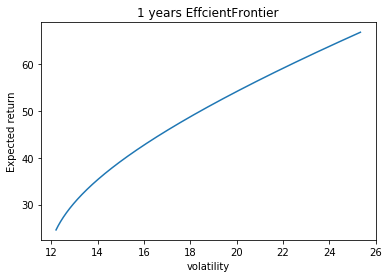

In [10]:
#1 years effcientFronter
R_cov =  np.array(R[break_points[2]:break_points[3]].cov())
R_expect = np.array(R[break_points[2]:break_points[3]].mean()).reshape(-1,1)
g1,h1,min_sigma1 = ghm(R_expect,R_cov)
sigma1,mu1,weight1 = effcientfrontier(g1,h1,R_cov,2000,200000)
plt.plot(sigma1,mu1)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("1 years EffcientFrontier")
plt.show()

In [11]:
weight1[0] # weight for minimum sigma(1 years)

array([[ 0.28985834],
       [ 0.01547922],
       [-0.04763136],
       [ 0.33534499],
       [ 0.0145087 ],
       [ 0.03392494],
       [ 0.05458261],
       [-0.03928113],
       [-0.07782384],
       [ 0.05566174],
       [ 0.08122668],
       [ 0.02055698],
       [ 0.14562982],
       [ 0.02441439],
       [-0.00734129],
       [ 0.03781209],
       [ 0.03603572],
       [ 0.0040041 ],
       [-0.00278641],
       [ 0.02582371]])

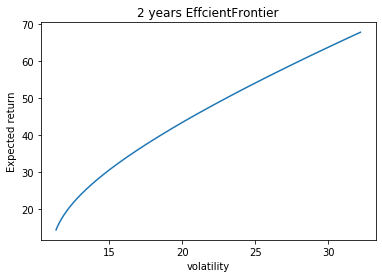

In [12]:
#2 years effcientFronter
R_cov2 =  np.array(R[break_points[1]:break_points[3]].cov())
R_expect2 = np.array(R[break_points[1]:break_points[3]].mean()).reshape(-1,1)
g2,h2,min_sigma2 = ghm(R_expect2,R_cov2)
sigma2,mu2,weight2 = effcientfrontier(g2,h2,R_cov2,2000,200000)
plt.plot(sigma2,mu2)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("2 years EffcientFrontier")
plt.show()

In [13]:
weight2[0] # weight for minimum sigma(2 years)

array([[ 0.22795886],
       [-0.03990323],
       [-0.02830564],
       [ 0.35041376],
       [ 0.04236483],
       [ 0.04263899],
       [-0.06597292],
       [ 0.02585746],
       [-0.01404113],
       [ 0.0496923 ],
       [ 0.0756634 ],
       [ 0.0334025 ],
       [ 0.11844693],
       [ 0.00373382],
       [ 0.00835447],
       [ 0.11291927],
       [ 0.03983696],
       [ 0.01815905],
       [-0.00400992],
       [ 0.00279022]])

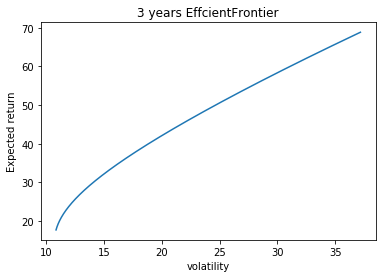

In [14]:
#3 years effcientFronter
R_cov3 =  np.array(R[break_points[0]:break_points[3]].cov())
R_expect3 = np.array(R[break_points[0]:break_points[3]].mean()).reshape(-1,1)
g3,h3,min_sigma3 = ghm(R_expect3,R_cov3)
sigma3,mu3,weight3 = effcientfrontier(g3,h3,R_cov3,2000,200000)
plt.plot(sigma3,mu3)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("3 years EffcientFrontier")
plt.show()

In [15]:
weight3[0] # weight for minimum sigma(3 years)

array([[ 1.77138982e-01],
       [-3.18246079e-02],
       [-1.81982962e-02],
       [ 3.01793642e-01],
       [ 2.82128601e-02],
       [ 9.24170840e-02],
       [-5.19196700e-02],
       [ 4.33380257e-02],
       [-5.02563395e-03],
       [ 3.82113248e-02],
       [ 4.50667741e-02],
       [ 1.58491961e-02],
       [ 1.27078784e-01],
       [ 1.44020071e-02],
       [ 3.18832710e-02],
       [ 1.24171925e-01],
       [ 2.17293294e-02],
       [ 1.48363652e-02],
       [-2.38407065e-04],
       [ 3.10770446e-02]])

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


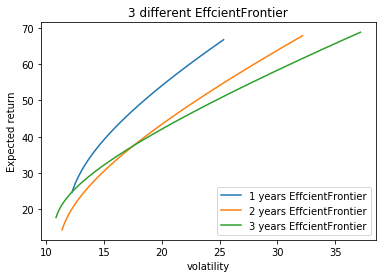

In [16]:
plt.plot(sigma1,mu1,label = "1 years EffcientFrontier")
plt.plot(sigma2,mu2,label = "2 years EffcientFrontier")
plt.plot(sigma3,mu3,label = "3 years EffcientFrontier")
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("3 different EffcientFrontier")
plt.legend()
plt.show()

In [0]:
R_copy = R.copy()
vxx = pd.read_csv('VXX.csv')
R_copy['VXX'] = np.array([((vxx['Adj Close'][j]/vxx['Adj Close'][j-1])-1) for j in range(1,len(vxx['Adj Close']))])

In [18]:
R_mean = pd.DataFrame()
R_mean["1 year"] = R_copy[break_points[2]:break_points[3]].mean()
R_mean["2 year"] = R_copy[break_points[1]:break_points[3]].mean()
R_mean["3 year"] = R_copy[break_points[0]:break_points[3]].mean()
R_mean

,1 year,2 year,3 year
TM(Toyota),0.000604,0.000239,0.000304
GOOG,0.000539,0.000451,0.000594
AMD,0.000603,0.001569,0.002022
AEP(American Electric Power),0.001217,0.000642,0.000663
BAC(Bank of American),0.000376,0.000350,0.000899
JPM(JPMorgan),0.000557,0.000518,0.000873
BRK-B(Berkshire Hathaway),0.000001,0.000210,0.000489
DIS(disney),0.000530,0.000630,0.000539
AAPL,0.000421,0.000840,0.000990
VZ(Verizon Communications),0.000606,0.000626,0.000437


In [19]:
R_var = pd.DataFrame()
R_var["1 year"] = R_copy[break_points[2]:break_points[3]].var()
R_var["2 year"] = R_copy[break_points[1]:break_points[3]].var()
R_var["3 year"] = R_copy[break_points[0]:break_points[3]].var()
R_var

,1 year,2 year,3 year
TM(Toyota),0.000098,0.000114,0.000099
GOOG,0.000324,0.000277,0.000218
AMD,0.001696,0.001406,0.001441
AEP(American Electric Power),0.000094,0.000096,0.000087
BAC(Bank of American),0.000271,0.000233,0.000230
JPM(JPMorgan),0.000176,0.000170,0.000153
BRK-B(Berkshire Hathaway),0.000140,0.000147,0.000116
DIS(disney),0.000213,0.000179,0.000145
AAPL,0.000400,0.000305,0.000241
VZ(Verizon Communications),0.000139,0.000143,0.000132


In [20]:
R_sharpo = pd.DataFrame()
rf = 0.0158
rf_daily = (1 + rf)**(1/250) - 1
R_sharpo["1 year"] = (R_mean["1 year"] - rf_daily )/R_var["1 year"]
R_sharpo["2 year"] = (R_mean["2 year"] - rf_daily )/R_var["2 year"]
R_sharpo["3 year"] = (R_mean["3 year"] - rf_daily )/R_var["3 year"]
R_sharpo 

,1 year,2 year,3 year
TM(Toyota),5.551086,1.542059,2.446167
GOOG,1.467587,1.401800,2.441910
AMD,0.318546,1.070918,1.359909
AEP(American Electric Power),12.256117,6.067954,6.901235
BAC(Bank of American),1.153905,1.232105,3.633832
JPM(JPMorgan),2.814384,2.681967,5.284104
BRK-B(Berkshire Hathaway),-0.438807,0.998253,3.674764
DIS(disney),2.191603,3.159082,3.271665
AAPL,0.894690,2.549833,3.840414
VZ(Verizon Communications),3.904017,3.942019,2.837340


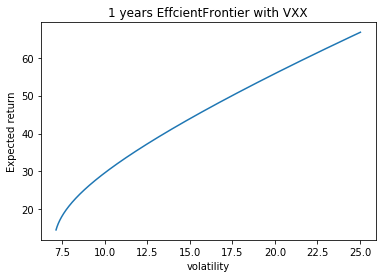

In [21]:
#1 years effcientFronter with VXX
R_cov4 =  np.array(R_copy[break_points[2]:break_points[3]].cov())
R_expect4 = np.array(R_copy[break_points[2]:break_points[3]].mean()).reshape(-1,1)
g4,h4,min_sigma4 = ghm(R_expect4,R_cov4)
sigma_v,mu_v,weight_v = effcientfrontier(g4,h4,R_cov4,2000,200000)
plt.plot(sigma_v,mu_v)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("1 years EffcientFrontier with VXX")
plt.show()

In [0]:
#Find the maximun sharpe ratio
def sharpe_ratio(sigma_v,mu_v,rf):
  sharpe = 0
  m = 0
  for i in range(len(sigma_v)):
    k_t = (mu_v[i] - rf*100)/sigma_v[i]
    if k_t > sharpe:
      sharpe = k_t
      m = i
  return sharpe,m


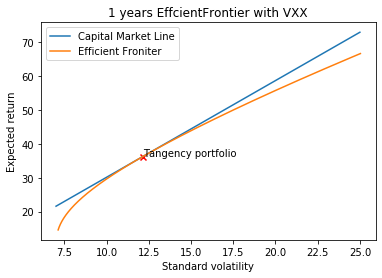

In [23]:
rf = 0.0158 # Choose 1 year US treasury rate as risk free rate
sigma_x = np.linspace(7,25,1000).reshape(-1,1)
sharpe,index_ = sharpe_ratio(sigma_v,mu_v,rf)
targent_v = (sharpe * sigma_x + rf*100).reshape(-1,1)
plt.plot(sigma_x,targent_v,label = "Capital Market Line")
plt.plot(sigma_v,mu_v,label = "Efficient Froniter")
plt.scatter(sigma_v[index_], mu_v[index_], color='r',marker = "x")
plt.text(sigma_v[index_], mu_v[index_],'Tangency portfolio',ha='left',fontsize=10)
plt.ylabel("Expected return")
plt.xlabel("Standard volatility")
plt.title("1 years EffcientFrontier with VXX")
plt.legend()
plt.show()


In [24]:
weight_v[0] # weight for min sigma

array([[0.09858   ],
       [0.03756154],
       [0.00234203],
       [0.1516477 ],
       [0.0172956 ],
       [0.1267295 ],
       [0.01312421],
       [0.00073126],
       [0.00138825],
       [0.04626243],
       [0.03926978],
       [0.03358525],
       [0.08833429],
       [0.03845354],
       [0.01582809],
       [0.05732822],
       [0.02607384],
       [0.00389342],
       [0.0268575 ],
       [0.03215925],
       [0.14255431]])

In [25]:
weight_v[index_]  # weight for tangency portfoilo

array([[ 0.12833084],
       [ 0.02058057],
       [-0.00572253],
       [ 0.28139009],
       [-0.04771709],
       [ 0.27979922],
       [-0.3389904 ],
       [-0.05424854],
       [-0.02974341],
       [-0.05305345],
       [ 0.0255774 ],
       [ 0.09539672],
       [ 0.15321549],
       [ 0.05452339],
       [ 0.20601091],
       [ 0.0341934 ],
       [ 0.08262153],
       [-0.01132032],
       [ 0.03694396],
       [ 0.04747671],
       [ 0.09473551]])

In [26]:
np.sum(np.abs(weight_v[index_]))/np.sum(weight_v[index_]) #leverage for the tangency portfoilo

2.0815914761616408

In [27]:
rf = 0.0158 # Choose 1 year US treasury rate as risk free rate
def findTangent(R_cov, R_expect, rf):
  rf_daily = (1 + rf)**(1/250) - 1
  one = np.ones((len(R_expect),1))
  w_b = np.dot(inv(R_cov),(R_expect - rf_daily*one))
  w_t = w_b/(np.dot(one.T,w_b))
  mu_T = np.dot(w_t.T,R_expect)
  mu_p = np.dot(w_b.T,R_expect) + (1 - np.dot(w_b.T,one))*rf_daily
  cp = (mu_p - rf_daily)/(np.dot(np.dot((R_expect - rf_daily*one).T,inv(R_cov)),(R_expect - rf_daily*one)))
  w_mp = cp * w_b
  print(w_t)
  return mu_T,w_t,w_b,w_mp
mu_T,w_t,w_b,w_mp = findTangent(R_cov4, R_expect4, rf)



[[ 0.13966389]
 [ 0.01411197]
 [-0.00879458]
 [ 0.33081317]
 [-0.07248252]
 [ 0.33810844]
 [-0.47312226]
 [-0.07519213]
 [-0.04160247]
 [-0.09088608]
 [ 0.02036153]
 [ 0.11894271]
 [ 0.17793084]
 [ 0.06064492]
 [ 0.2784577 ]
 [ 0.0253806 ]
 [ 0.10416238]
 [-0.01711572]
 [ 0.04078621]
 [ 0.05331163]
 [ 0.07651978]]


In [28]:
sigma_T = np.dot(np.dot(w_t.T,R_cov4),w_t)[0][0]
mu_annual = (np.exp(mu_T*250 + sigma_T/2)-1)*100
sigma_annual = np.sqrt((np.exp(sigma_T)-1)*np.exp(2*mu_T*250 + sigma_T))*100
k = (mu_annual - rf*100)/sigma_annual
print(k[0][0])

43.93677172161802
